**Exploring Social Complex Analysis by Networks**

First of all: importing Python libraries

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
from networkx.algorithms import community as nxc
from operator import itemgetter 

Next step: getting a fitted dataset to analyze.

We will deal with two different data types and relations. 
      
1. marriages between families em Renaissance Florentine 15th Century (adapted). Undirect graph comprised of 16 families and 20 marriages. IN:  J Padgett C Ansell "Robust Action and the Rise of the Medici, 1400-1434" American Journal of Sociology (1993). 

2. memberships and organizational exchanges between people and groups before the American Revolution (22 March 1765 – 14 January 1784). As a bipartite complex relationship, there are 131 leaders and 5 organizations whose contacts were by a figure of 160. IN: J. Kunegis "American revolution network dataset" KONECT (2016), https://doi.org/10.1145/2487788.2488173 

3. friendships between aquaintances in a school, Illinois, 1957 (adapted). Directed graph with 20 boys and 95 friendships. Under survey questionaire, each boy could choose the same boy twice, edge values from 1 to 2 are allowed. J. S. Coleman. Introduction to Mathermatical Sociology (1964).


 
Other codes and explanations, from those sources:

- Jackson, M.O., 2010. Social and economic networks. Princeton university press.

- Zinoviev, D., 2018. Complex network analysis in Python: Recognize-construct-visualize-analyze-interpret. Pragmatic Bookshelf.

- NetworkX Documentation. In: https://networkx.org/documentation/stable/reference/index.html



Second, loading csv documents and tweaking networks by Pandas and NetworkX:

In [2]:
df_marriages_florence = pd.read_csv("/content/edge_list_florentine.csv")

df_contacts_american_revolution = pd.read_csv("/content/edge_list_american_revolution.csv")

df_friendship_boys = pd.read_csv("/content/edge_list_Illinois_highschool_adapt.csv")

G_marriages = nx.from_pandas_edgelist(df_marriages_florence, source="V1", target="V2")

G_Contacts = nx.from_pandas_edgelist(df_contacts_american_revolution, source="node1", target="node2")

G_Friendships = nx.from_pandas_edgelist(df_friendship_boys, source="from_node", target="to_node", edge_attr="edge weight", create_using=nx.DiGraph(),)


Making an adjacency matrix to run into GEPHI: 

In [3]:
adj_matrix = nx.to_pandas_adjacency(G_Friendships, weight="edge weight")
adj_matrix
adj_matrix.to_csv("/content/adj_matrix_Illinois_highschool_adapt.csv")

Then, analysis!

# 1. Marriages in Florence:

- Checking **Degree** by families

- Checking **Betweeness Centrality**

In [4]:
dc_m = nx.degree_centrality(G_marriages)
dc_marriages = pd.Series(dc_m,)
dc_marriages.sort_values(ascending=False)

Medici       0.428571
Guadagni     0.285714
Strozzi      0.285714
Albizzi      0.214286
Castellan    0.214286
Bischeri     0.214286
Peruzzi      0.214286
Tornabuon    0.214286
Ridolfi      0.214286
Barbadori    0.142857
Salviati     0.142857
Acciaiuol    0.071429
Ginori       0.071429
Lambertes    0.071429
Pazzi        0.071429
dtype: float64

In [5]:
bc_m = nx.betweenness_centrality(G_marriages)
bc_marriages = pd.Series(bc_m)
bc_marriages.sort_values(ascending=False)

Medici       0.521978
Guadagni     0.254579
Albizzi      0.212454
Salviati     0.142857
Ridolfi      0.113553
Bischeri     0.104396
Strozzi      0.102564
Barbadori    0.093407
Tornabuon    0.091575
Castellan    0.054945
Peruzzi      0.021978
Acciaiuol    0.000000
Ginori       0.000000
Lambertes    0.000000
Pazzi        0.000000
dtype: float64

- **DEGREE** of node is the number of links that each node has (proportionally).
- **BETWEENNESS CENTRALITY** of a node *v* is the sum of the fraction of all-pairs shortest paths that pass through *v*:


BC(*v*) = sum( (number of those paths passing through some node *v*) / (is the number of shortest paths) )

We might see in this depicting which family has more directed centrality (degree) and shortest path to reach different parts into the network (betweenness centrality), getting more (Zinoviev 2018): 
- accruing **SOCIAL CAPITAL** to produce common good for the family friends
- **INFLUENCE** over the community
- **INFORMATION DISSEMINATION** to put ahead their versions of facts by them
- **BROKERAGE** joint with powerful people through access of different families.

Special heed has to be payed about those families: Medici, Strozzi, Peruzzi and Salviatti. Let's get more details in "4. Egocentric Networks". 

now, 

# 2. American Revolution Contacts:

- Checking **Closeness Centrality** 

- Checking **Eccentricity** and **Eigenvector Centrality**

In [6]:
cc_c = nx.closeness_centrality(G_Contacts)
cc_contacts = pd.Series(cc_c)
cc_contacts.sort_values(ascending=False).head(15)

ORG4    0.501859
126     0.498155
106     0.478723
ORG1    0.477032
ORG5    0.463918
ORG3    0.450000
125     0.441176
31      0.420561
8       0.406627
84      0.406627
55      0.406627
41      0.406627
136     0.406627
129     0.385714
38      0.385714
dtype: float64

In [ ]:
ecc_c = nx.eccentricity(G_Contacts)
ecc_contacts = pd.Series(ecc_c)
ecc_contacts.sort_values(ascending=False).head(30)

36     5
124    5
112    5
40     5
58     5
50     5
48     5
123    5
32     5
98     5
43     5
37     5
6      5
134    5
74     5
97     4
96     4
91     4
95     4
94     4
99     4
93     4
92     4
87     4
90     4
89     4
88     4
86     4
85     4
83     4
dtype: int64

In [ ]:
ev_c = nx.eigenvector_centrality(G_Contacts, max_iter=105)
ev_contacts = pd.Series(ev_c)
ev_contacts.sort_values(ascending=False).head(15)

ORG1    0.521676
ORG4    0.427457
ORG3    0.190437
ORG5    0.184367
126     0.153804
106     0.130084
125     0.118220
31      0.100561
ORG2    0.095247
84      0.088697
55      0.088697
41      0.088697
136     0.088697
8       0.088697
27      0.087941
dtype: float64

- **CLOSENESS CENTRALITY** of a node *u* is the reciprocal of the average shortest path distance to *u* over all *n-1* reachable nodes.

CC(*u*) = (n-1) / sum(shortest-path distance between *v* and *u*)

- **ECCENTRICITY** of a node *v* is the maximum distance from *v* to all other nodes in G.

- **EIGENVECTOR CENTRALITY** computes the centrality for a node based on the centrality of its neighbors. The eigenvector centrality for a node i is the i-th element of the vector x defined by: 
                                  Ax = λx 
A is a adjacency matrix of the graph G with eigenvalue λ.


Especially, it's possible to look at the centrality level and to realise the importance of some ones to get strategic positions to be proeminent in the informational flow -- pay heed over 126, 106, 31 and 125 guys --, as well as the 15 actors/actrees with more specific notions about the revolution (knowledge preservation) will be under the highest level of eccentricity -- 5, thus, more tightly linked with specific organizations.

We can grasp through those cases (Zinoviev 2018):
- **INFLUENCE** from some ones over organizations, as well as organizations over individual behaviours
- **INFORMATION DISSEMINATION** by some ones to define tactics agains the stabilishment
- **KNOWLEDGE PRESERVATION** by some actors who are tightly knit with specific organizations, preserving their specific notions about the revolutionary process.


# 3. Boy's Friendships:

- Checking **Indegree**
- Checking **HITS**
- Checking **Clustering Coefficient**
- Checking **Modularity Class**

It's feasible to understand who is more eccletic or closed in his friendship. Also it's possible to understand the level of popularity. Ultimately, we can realise three more bended "clubs" of friendship.

Special heed can be payed about some boys: Jason, Thomas, Andrew and Rudolph. More depthness might be reached next session. 

In [7]:
indegree_f = nx.in_degree_centrality(G_Friendships)
indegree_friendships = pd.Series(indegree_f)
indegree_friendships.sort_values(ascending=False)

Jason      0.631579
Tim        0.578947
Hilbert    0.421053
Lucas      0.368421
John       0.368421
Patrick    0.315789
Antonio    0.263158
Daniel     0.263158
Julio      0.210526
George     0.210526
Lucio      0.210526
Marcos     0.210526
Andrew     0.157895
Gerald     0.157895
Sam        0.105263
Albert     0.105263
Pedro      0.105263
Rudolph    0.105263
Max        0.000000
Thomas     0.000000
dtype: float64

In [ ]:
hits_f = nx.hits(G_Friendships)
hits_friendships = pd.DataFrame(hits_f, index=("hubs","authorities"))
hits_friendships.T.sort_values("authorities", ascending=False)

,hubs,authorities
Jason,0.048215,0.134842
Tim,0.047534,0.125739
Hilbert,0.045910,0.094675
Lucas,0.056553,0.082202
John,0.000000,0.066895
Antonio,0.046690,0.061359
Daniel,0.071755,0.054905
Marcos,0.057496,0.054536
Lucio,0.020280,0.051989
Patrick,0.068248,0.049841


In [ ]:
clust_f = nx.clustering(G_Friendships)
clust_friendships = pd.Series(clust_f)
clust_friendships.sort_values(ascending=False)

Gerald     0.769231
Max        0.666667
Sam        0.533333
Julio      0.444444
Pedro      0.444444
Andrew     0.404762
Rudolph    0.365385
Hilbert    0.351852
Antonio    0.348837
Lucas      0.339623
Albert     0.325000
Tim        0.300971
Daniel     0.292453
John       0.285714
Patrick    0.273256
Marcos     0.267442
Jason      0.264957
Lucio      0.263158
George     0.261364
Thomas     0.250000
dtype: float64

In [ ]:
modularity_f = nxc.greedy_modularity_communities(G_Friendships, n_communities=3)
modularity_friendships = pd.DataFrame(modularity_f)
modularity_friendships.T


,0,1,2
0,Jason,Gerald,Rudolph
1,Daniel,Andrew,Albert
2,Max,Patrick,Lucas
3,Tim,John,None
4,Hilbert,Julio,None
5,Marcos,Antonio,None
6,George,Lucio,None
7,Pedro,None,None
8,Sam,None,None
9,Thomas,None,None


- **INDEGREE** is the number of edges pointing to the node.

- **HUBS** estimates the node values based on outgoing links; **AUTORITIES** estimates the node values based on the incoming links. Both are a Eigenvector Centrality derivation, under iterations whose stop happens when maximum iterations or error tolerance of number of nodes are reached. 

- **CLUSTERING COEFFICIENT** of node *u* is the fraction of possible triangles through that node *u* that exist (when weights, it can have any multiplying by them):

ClustCoeff(u) = 2 * T(u) / (degree(u) * (degree(u)-1)

- **MODULARITY CLASS** is a way to define communities through a given partition of the graph ("sum iterates over all communities, based on edges"):

Mod(*c*) = sum(("number of intra-community links for a community *c*" / "number of edges") - "number of desired communities" * ("sum of degrees of nodes in community *c* / (2 * "number of edges")))




It's feasible to understand who is more eccletic or closed in his friendship. Also it's possible to understand the level of popularity. Ultimately, we can realise three more bended "clubs" of friendship.

Especially, it's feasible to understand:

- **INFLUENCE** from some boys' behaviours above of others
- **STRUCTURAL EQUIVALENCE**, whose meaning points out some boys with similar connections, suposing they are similar or equivalent
- **TRIADIC CLOSURE**, meanwhile two friends of anyone else eventually become friends
- considering underlying boys' features (whose could be extracted by more studies), **BALANCE THEORY** might be seen, such as "a friend of a friend is a friend, a friend of a foe is a foe, and so on".
- **HOMOPHILY**, supposing boys with similar features will be holding friendships
- **COMPLEX CONTAGION**, because a gang of school boys interconnected may be a source of spread of things (if we looked at sexual relationships rather than friendships, it could be even more effective). 

then, 

# 4. Exploring differences within Egocentric and Sociocentric Networks.

## 4.1 Egocentric

"all of edges straightly connected with other nodes (*alters*), adding a second edge (and next node/alter) beyond"

For each one case:
1. finding a node with largest measure already computed in 3.
2. create ego graph of main hub
3. draw egocentric network 

### 4.1.1 Florentine Marriages

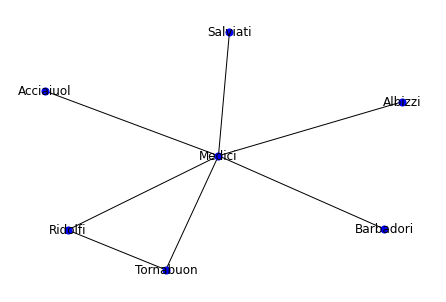

In [ ]:
seed = 123

hub_ego_Medici = nx.ego_graph(G_marriages, "Medici") # create ego graph of main hub of MEDICI, largest betweenness centrality:

pos = nx.spring_layout(hub_ego_Medici, seed=seed) # draw graph, seed layout for reproducibility 
nx.draw(hub_ego_Medici, pos, node_color="b", node_size=50, with_labels=True)

plt.show()

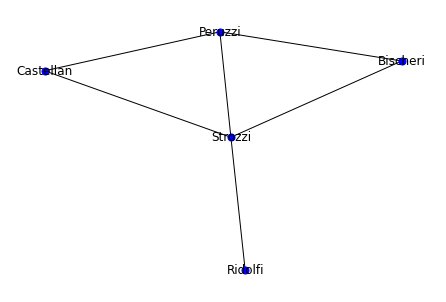

In [10]:
seed = 123

hub_ego_Strozzi = nx.ego_graph(G_marriages, "Strozzi") # create ego graph of main hub of STROZZI, one of the largest degree but lower betweenness:

pos = nx.spring_layout(hub_ego_Strozzi, seed=seed) # draw graph, seed layout for reproducibility 
nx.draw(hub_ego_Strozzi, pos, node_color="b", node_size=50, with_labels=True)

plt.show()

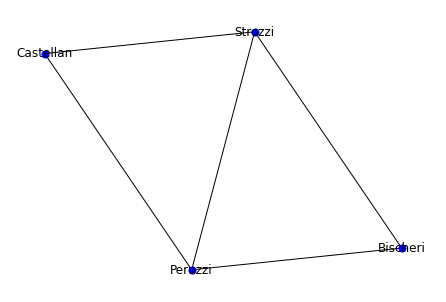

In [ ]:
seed = 123

hub_ego_Peruzzi = nx.ego_graph(G_marriages, "Peruzzi") # create ego graph of main hub of PERUZZI, one of the largest degree but lower betweenness:

pos = nx.spring_layout(hub_ego_Peruzzi, seed=seed) # draw graph, seed layout for reproducibility 
nx.draw(hub_ego_Peruzzi, pos, node_color="b", node_size=50, with_labels=True)

plt.show()



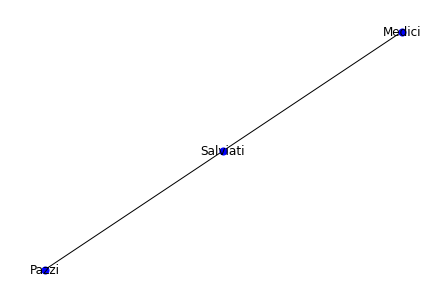

In [ ]:
seed = 123

hub_ego_Salviati = nx.ego_graph(G_marriages, "Salviati") # create ego graph of main hub of SALVIATI, one of the lowest degree whereas one of the highest betweenness:

pos = nx.spring_layout(hub_ego_Salviati, seed=seed) # draw graph, seed layout for reproducibility 
nx.draw(hub_ego_Salviati, pos, node_color="b", node_size=50, with_labels=True)

plt.show()     

### 4.1.2 American Revolution

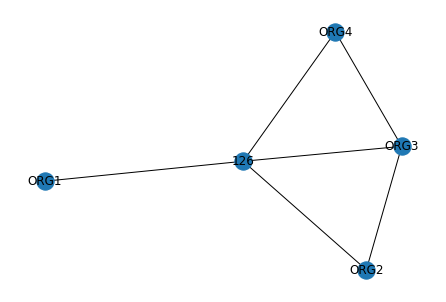

In [ ]:
seed = 123

hub_ego_126 = nx.ego_graph(G_Contacts, "126") # create ego graph of main hub of Eigenvector centrality, 126

pos = nx.spring_layout(hub_ego_126, seed=seed) # draw graph, seed layout for reproducibility 
nx.draw(hub_ego_126, pos, with_labels=True)

plt.show()

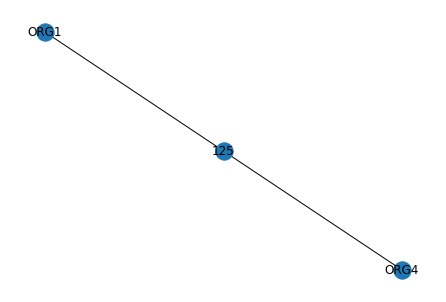

In [ ]:
seed = 123

hub_ego_125 = nx.ego_graph(G_Contacts, "125") # create ego graph of second main of Closeness centrality and one of less eccentricity, 125

pos = nx.spring_layout(hub_ego_125, seed=seed) # draw graph, seed layout for reproducibility 
nx.draw(hub_ego_125, pos, with_labels=True)

plt.show()

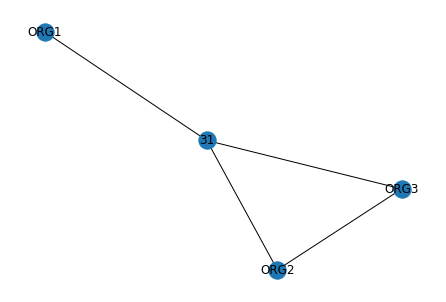

In [ ]:
seed = 123

hub_ego_31 = nx.ego_graph(G_Contacts, "31") # create ego graph of one of biggest eigenvector, 31

pos = nx.spring_layout(hub_ego_31, seed=seed) # draw graph, seed layout for reproducibility 
nx.draw(hub_ego_31, pos, with_labels=True)

plt.show()

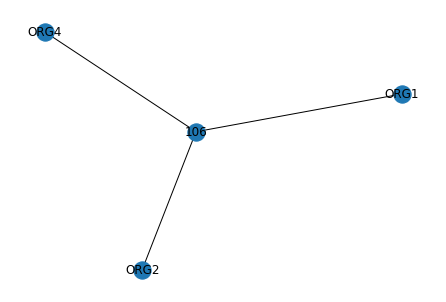

In [ ]:
seed = 123

hub_ego_106 = nx.ego_graph(G_Contacts, "106") # create ego graph of one of biggest eigenvector, 106

pos = nx.spring_layout(hub_ego_106, seed=seed) # draw graph, seed layout for reproducibility 
nx.draw(hub_ego_106, pos, with_labels=True)

plt.show()

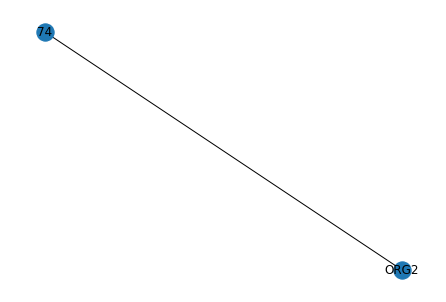

In [ ]:
seed = 123

hub_ego_123 = nx.ego_graph(G_Contacts, "74") # create ego graph of one of highest level of Eccentricity, 74

pos = nx.spring_layout(hub_ego_123, seed=seed) # draw graph, seed layout for reproducibility 
nx.draw(hub_ego_123, pos, with_labels=True)

plt.show()

### 4.1.3 Boy's Friendships

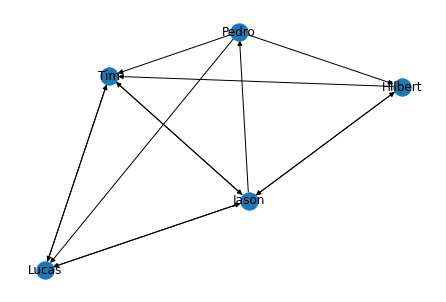

In [ ]:
seed = 123

hub_ego_Jason = nx.ego_graph(G_Friendships, "Jason") # create ego graph of main hub of Authority, Jason 

pos = nx.spring_layout(hub_ego_Jason, seed=seed) # draw graph, seed layout for reproducibility 
nx.draw(hub_ego_Jason, pos, with_labels=True)

plt.show()

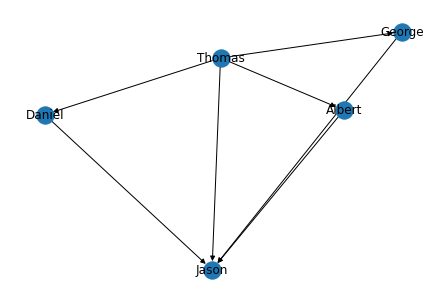

In [ ]:
seed = 123

hub_ego_Thomas = nx.ego_graph(G_Friendships, "Thomas") # create ego graph of less clustering coefficient of first modularity cluster, Thomas

pos = nx.spring_layout(hub_ego_Thomas, seed=seed) # draw graph, seed layout for reproducibility 
nx.draw(hub_ego_Thomas, pos, with_labels=True)

plt.show()

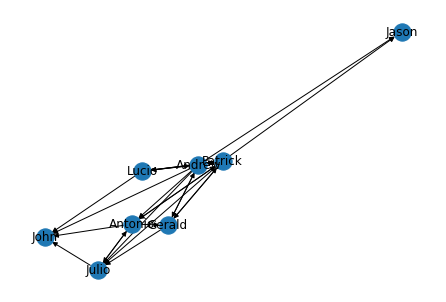

In [ ]:
seed = 123

hub_ego_Andrew = nx.ego_graph(G_Friendships, "Andrew") # create ego graph of less important authority of second modularity cluster, Andrew

pos = nx.spring_layout(hub_ego_Andrew, seed=seed) # draw graph, seed layout for reproducibility 
nx.draw(hub_ego_Andrew, pos, with_labels=True)

plt.show()

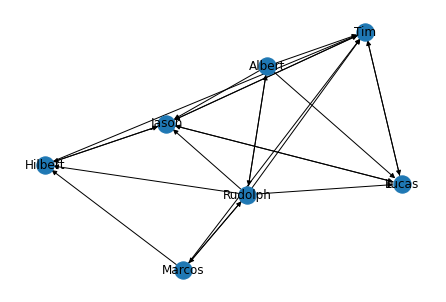

In [ ]:
seed = 123

hub_ego_Rudolph = nx.ego_graph(G_Friendships, "Rudolph") # create ego graph of main person of third modularity cluster, Rudolph 

pos = nx.spring_layout(hub_ego_Rudolph, seed=seed) # draw graph, seed layout for reproducibility 
nx.draw(hub_ego_Rudolph, pos, with_labels=True)

plt.show()

## 4.2 Sociocentric

ELEMENTS TO **COMPARE** NETWORKS:

**i. SIZE AND CONNECTIVITY**
    
    i.i DIAMETER:
largest distance between any two nodes in the network
    
    i.ii AVERAGE PATH LENGTH:
based on geodesics, or path lenghts. Useful to see whether the diameter is being determined by a few outliers (literally), or whether it is of the same order as the average geodesic.


*TYPES OF GRAPHS BY SIZE AND CONNECTIVITY:*
    
*- CIRCLE (more diameter, average path length tend to diameter)*  
   
*- TREE(less diameter, average path length tends to diameter if the network is balanced; when unbalanced, differs to diameter)*

*- STAR (less diameter, average path length tend to diameter)*

**ii. NODE DEGREE ANALYSIS and TYPES OF GRAPHS**
    
    ii.i DEGREE DISTRIBUTION:
The distribution of the degree of nodes. 

    ii.ii ASSORTATIVITY: 
Assortativity measures the correlation between high degree nodes (if high degree nodes have high tendency to be connected with each other).

    ii.iii DENSITY:
The density is 0 for a graph without edges and 1 for a complete graph

*TYPES OF GRAPHS BY DEGREES (more/less centralized for some nodes; more/less segmented by components):*

*- STAR (unbalanced degree distribution, negative assortativity, "increasing nodes, decreasing density")* 

*- CYCLE NET (balanced degree distribution, positive assortativity, "increasing nodes, decreasing density")* 

*- COMPLETE NET (balanced degree distribution, positive assortativity, "increasing nodes, increasing density")*


**iii. EDGE ANALYSIS and TYPES OF SUBGRAPHS:** 
  
    iii.ii NUMBER OF COMPONENTS

    iii.iii NUMBER OF BRIDGES

*TYPES OF SUBGRAPHS:*

*- UNIQUE COMPONENT (one component, regardless of bridges for connectness)*

*- MULTICLIQUESHNESS COMPONENTS (less density, many components, regard of bridges for connectness).*


**iv. TRANSITIVE TRIPLE ANALYSIS**
    
    iv.i TRANSITIVITY (ALL OF POSSIBLE TRIANGLES)
    iv.ii AVERAGE CLUSTERING COEFFICIENT (ALL TRIANGLES OVER ALL POSSIBLE TRIANGLES) 

    



### 4.2.1 Florentine Families vs. Erdos-Renyi Random Graph

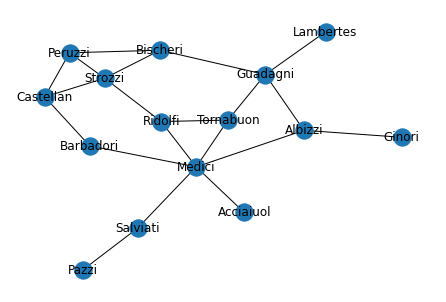

In [ ]:
seed = 123
pos = nx.spring_layout(G_marriages, seed=seed)
nx.draw(G_marriages, pos, with_labels=True)

G = nx.cycle_graph(1000)

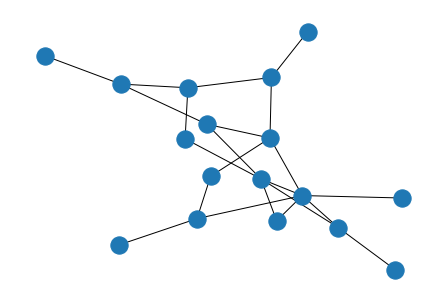

In [12]:
er_comp = nx.erdos_renyi_graph(n=15, p=.11, seed=123) # forcing "p" to be similar to the empirical network
seed = 123
pos = nx.spring_layout(er_comp, seed=seed)
nx.draw(er_comp, pos)

#### i. SIZE AND CONNECTIVITY

In [ ]:
print("Diameter of Florentine Marriages is", nx.diameter(G_marriages))

print("Diameter of ER Random is", nx.diameter(er_comp))

print("Average Path Length of Florentine Marriages is", nx.average_shortest_path_length(G_marriages))

print("Average Path Length of ER Random is", nx.average_shortest_path_length(er_comp))

Diameter of Florentine Marriages is 5
Diameter of ER Random is 6
Average Path Length of Florentine Marriages is 2.4857142857142858
Average Path Length of ER Random is 2.6857142857142855


#### ii. NODE DEGREE ANALYSIS and TYPES OF GRAPHS 

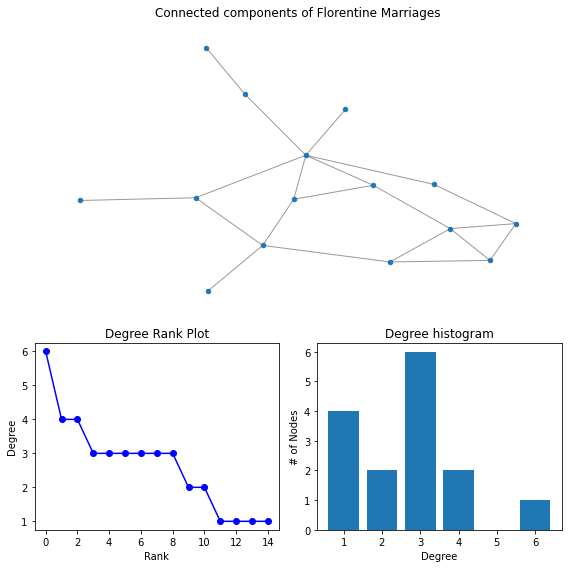

assortativity is -0.37483787289234866
density is 0.19047619047619047


In [ ]:
# Florentine Marriages
degree_sequence = sorted((d for n, d in G_marriages.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a Florentine Marriages", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G_marriages.subgraph(sorted(nx.connected_components(G_marriages), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of Florentine Marriages")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

print("assortativity is", nx.degree_assortativity_coefficient(G_marriages))
print("density is", nx.density(G_marriages))

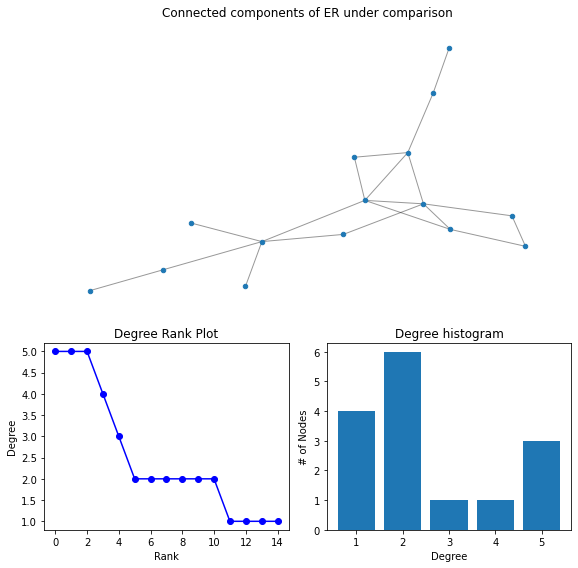

assortativity is -0.12848484848484862
density is 0.18095238095238095


In [ ]:
# Erdos-Renyi Random Graph
degree_sequence = sorted((d for n, d in er_comp.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = er_comp.subgraph(sorted(nx.connected_components(er_comp), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of ER under comparison")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

print("assortativity is", nx.degree_assortativity_coefficient(er_comp))
print("density is", nx.density(er_comp))

#### iii. EDGE ANALYSIS and TYPES OF SUBGRAPHS:

In [ ]:
bridges_marriages = nx.bridges(G_marriages)
bridges_er = nx.bridges(er_comp)
print("The amount of Bridges of Florentine Marriages is", len(list(bridges_marriages)))
print("The amount of Bridges of ER Random Graph is", len(list(bridges_er)))

print("The amount of Components of Florentine Marriages is", nx.number_connected_components(G_marriages))
print("The amount of Components of ER Random Graph is", nx.number_connected_components(er_comp))

The amount of Bridges of Florentine Marriages is 5
The amount of Bridges of ER Random Graph is 6
The amount of Components of Florentine Marriages is 1
The amount of Components of ER Random Graph is 1


#### iv. TRANSITIVE TRIPLE ANALYSIS

In [ ]:
print("Transitivity in Florentine Marriages is", nx.transitivity(G_marriages))
print("Transitivity in ER Random Graph is", nx.transitivity(er_comp))

print("Average Clustering in Florentine Marriages is", nx.average_clustering(G_marriages))
print("Average Clustering in ER Random Graph is", nx.average_clustering(er_comp))

Transitivity in Florentine Marriages is 0.19148936170212766
Transitivity in ER Random Graph is 0.2
Average Clustering in Florentine Marriages is 0.16
Average Clustering in ER Random Graph is 0.14444444444444443


### 4.2.2 American Revolution vs. Holme-Kim Preferential Attachment Power Law Graph

*   List item
*   List item



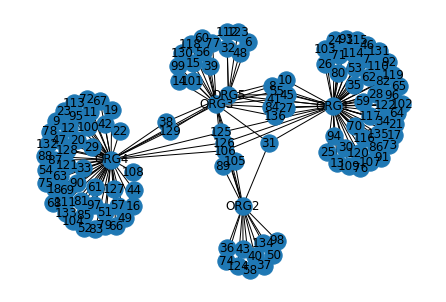

In [ ]:
nx.draw(G_Contacts, with_labels=True) # better to visualize

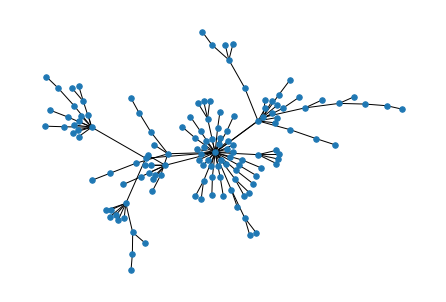

In [ ]:
pa_comp = nx.powerlaw_cluster_graph(n=136, m=1, p=0.8, seed=123) 
seed = 123
pos = nx.spring_layout(pa_comp, seed=seed)
nx.draw(pa_comp, pos, node_size=30,)



#### i. SIZE AND CONNECTIVITY

In [ ]:
print("Diameter of American Revolution Network is", nx.diameter(G_Contacts))

print("Diameter of Power Law Network is", nx.diameter(pa_comp))

print("Average Path Length of American Revolution Network is", nx.average_shortest_path_length(G_Contacts))

print("Average Path Length of Power Law Network is", nx.average_shortest_path_length(pa_comp))

Diameter of American Revolution Network is 5
Diameter of Power Law Network is 11
Average Path Length of American Revolution Network is 3.009694989106754
Average Path Length of Power Law Network is 4.298692810457516


#### ii. NODE DEGREE ANALYSIS and TYPES OF GRAPHS 

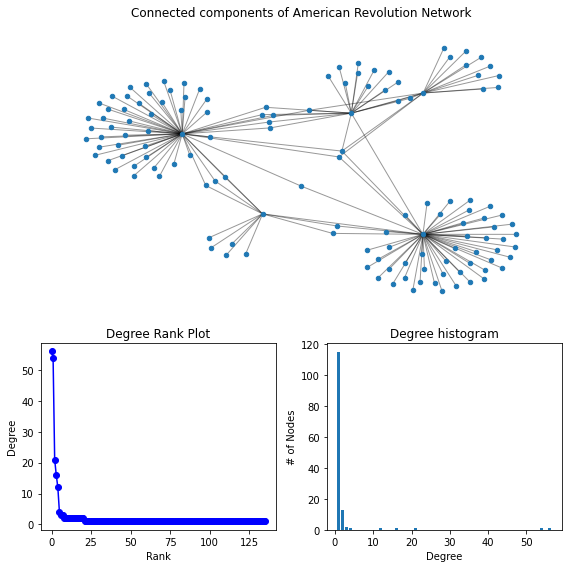

assortativity is -0.751468148483306
density is 0.016884531590413945


In [ ]:
# American Revolution Network
degree_sequence = sorted((d for n, d in G_Contacts.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a American Revolution Network", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G_Contacts.subgraph(sorted(nx.connected_components(G_Contacts), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of American Revolution Network")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

print("assortativity is", nx.degree_assortativity_coefficient(G_Contacts))
print("density is", nx.density(G_Contacts))

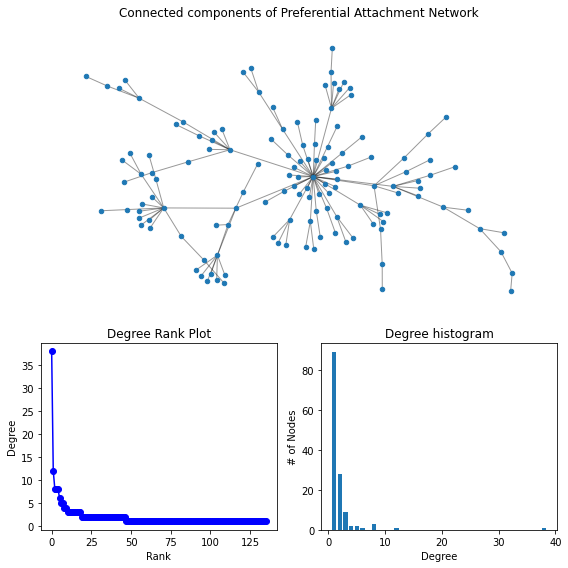

assortativity is -0.2319201906383221
density is 0.014705882352941176


In [ ]:
# Holme-Kim Graph
degree_sequence = sorted((d for n, d in pa_comp.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of Preferential Attachment Network", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = pa_comp.subgraph(sorted(nx.connected_components(pa_comp), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of Preferential Attachment Network")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

print("assortativity is", nx.degree_assortativity_coefficient(pa_comp))
print("density is", nx.density(pa_comp))

#### iii. EDGE ANALYSIS and TYPES OF SUBGRAPHS:

In [ ]:
bridges_contacts = nx.local_bridges(G_Contacts)
bridges_pa = nx.local_bridges(pa_comp)
print("The amount of Bridges of American Revolution Network is", len(list(bridges_contacts)))
print("The amount of Bridges of Preferential Attachment Network is", len(list(bridges_pa)))

print("The amount of Components of American Revolution Network is", nx.number_connected_components(G_Contacts))
print("The amount of Components of Preferential Attachment Network is", nx.number_connected_components(pa_comp))

The amount of Bridges of American Revolution Network is 132
The amount of Bridges of Preferential Attachment Network is 135
The amount of Components of American Revolution Network is 1
The amount of Components of Preferential Attachment Network is 1


#### iv. TRANSITIVE TRIPLE ANALYSIS

In [ ]:
print("Transitivity in American Revolution Network is", nx.transitivity(G_Contacts))
print("Transitivity in Preferential Attachment Network is", nx.transitivity(pa_comp))

print("Average Clustering in American Revolution Network is", nx.average_clustering(G_Contacts))
print("Average Clustering in Preferential Attachment Network is", nx.average_clustering(pa_comp))

Transitivity in American Revolution Network is 0.00884433962264151
Transitivity in Preferential Attachment Network is 0
Average Clustering in American Revolution Network is 0.05737949696745479
Average Clustering in Preferential Attachment Network is 0.0


### 4.2.3 Boys' Friendships vs "Random k-out graph with preferential attachment"

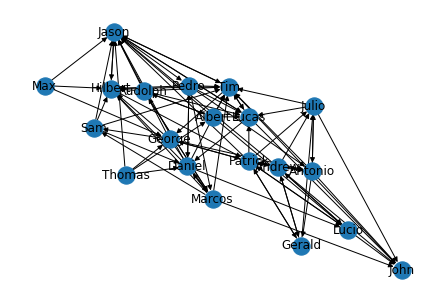

In [ ]:
seed = 123
pos = nx.spring_layout(G_Friendships, seed=seed)
nx.draw(G_Friendships, pos, with_labels=True)

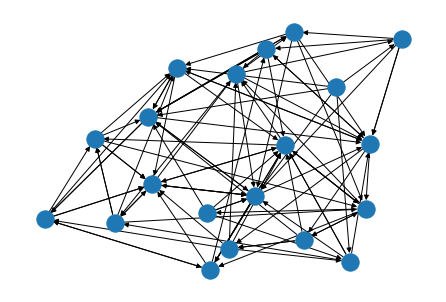

In [ ]:
kout = nx.random_k_out_graph(n=20, k=5, alpha=2.6, self_loops=False, seed=123) # forcing k=5 (number of "out-edges") to be similar to the empirical network (4.75 edges per boy)
seed = 123
pos = nx.spring_layout(kout, seed=seed)
nx.draw(kout, pos)

#### i. SIZE AND CONNECTIVITY

In [ ]:
# just Average Path Length, because DIAMETER doesn't run with DiGraph overconnected

print("Average Path Length of Boys' Friendships Network is", nx.average_shortest_path_length(G_Friendships))

print("Average Path Length of K-Out Preferential Attachment Network is", nx.average_shortest_path_length(kout))

Average Path Length of Boys' Friendships Network is 1.8
Average Path Length of K-Out Preferential Attachment Network is 1.9263157894736842


#### ii. NODE DEGREE ANALYSIS and TYPES OF GRAPHS 

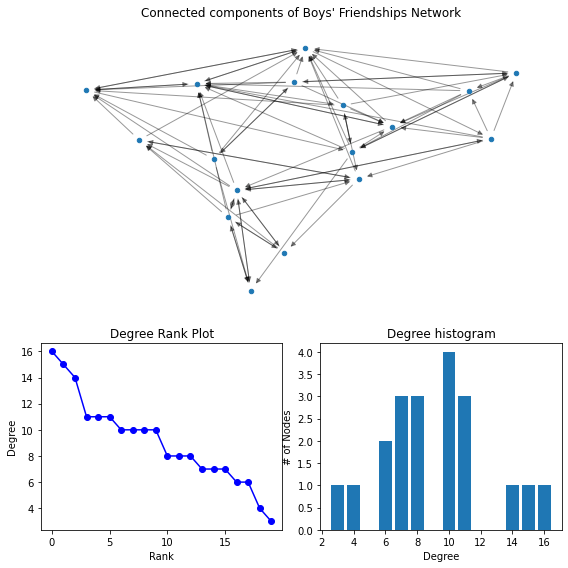

assortativity is 0.0565871495435953
density is 0.2394736842105263


In [ ]:
# American Revolution Network
degree_sequence = sorted((d for n, d in G_Friendships.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a Boys' Friendships Network", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G_Friendships.subgraph(sorted(nx.strongly_connected_components(G_Friendships), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of Boys' Friendships Network")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

print("assortativity is", nx.degree_pearson_correlation_coefficient(G_Friendships, x="in", y="in"))
print("density is", nx.density(G_Friendships))

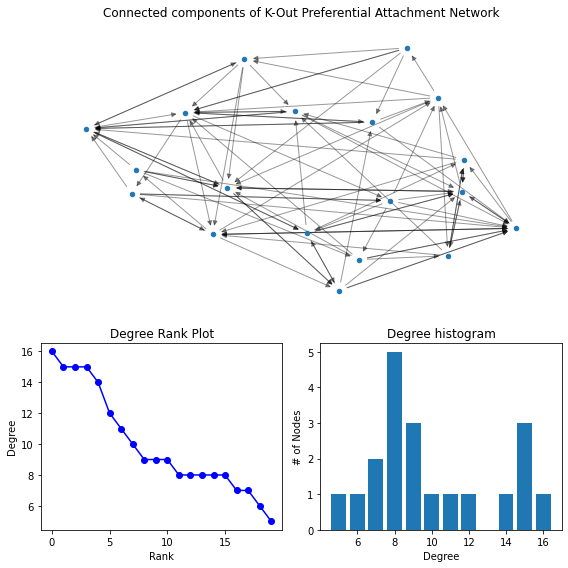

assortativity is -0.12922108444069144
density is 0.2631578947368421


In [ ]:
# Holme-Kim Graph
degree_sequence = sorted((d for n, d in kout.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of K-Out Preferential Attachment Network", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = kout.subgraph(sorted(nx.strongly_connected_components(kout), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of K-Out Preferential Attachment Network")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

print("assortativity is", nx.degree_pearson_correlation_coefficient(kout, x="in", y="in"))
print("density is", nx.density(kout))

#### iii. EDGE ANALYSIS and TYPES OF SUBGRAPHS:

In [ ]:
# BRIDGES are not checked in DiGraphs

print("The amount of Components of Boys' Friendships Network is", nx.number_strongly_connected_components(G_Friendships))
print("The amount of Components of K-Out Preferential Attachment Network is", nx.number_strongly_connected_components(kout))

The amount of Components of Boys' Friendships Network is 4
The amount of Components of K-Out Preferential Attachment Network is 2


#### iv. TRANSITIVE TRIPLE ANALYSIS [using SQUARE CLUSTERING]

In [ ]:
sq_clust_b = nx.square_clustering(G_Friendships) # first, extracting individual square clustering (sum of number of common neighbours of two nodes over sum of them plus a coeff of connectivity )
sq_clust_s = nx.square_clustering(kout)

sq_clust_boys = pd.Series(sq_clust_b)
sq_clust_simulated = pd.Series(sq_clust_s)

av_clustering_boys = np.mean(sq_clust_boys)
av_clustering_simulated = np.mean(sq_clust_simulated)

print("Average Clustering in Boys' Friendships Network is", av_clustering_boys)
print("Average Clustering in K-Out Preferential Attachment Network is", av_clustering_simulated)

Average Clustering in Boys' Friendships Network is 0.27673498327113627
Average Clustering in K-Out Preferential Attachment Network is 0.20361216728395415
